### Python module 3. **pandas**

# Using pandas

* [10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Pandas tutorial with interactive exercises](https://www.kaggle.com/pistak/pandas-tutorial-with-interactive-exercises)

In [0]:
import pandas as pd   #pandas사용하기위해서는 무조건 아래 3줄사용
import numpy as np    #
import matplotlib.pyplot as plt #
%matplotlib inline

## [1] Make data: Series, and DataFrame
> pandas의 데이터 구조
- Series
- DataFrame

##R이라는 통계 프로그램에서 기본 데이터 구조 
##dataFrame = df 사용 -> pandas에서 사용

### Series
> 1차원 데이터

In [119]:
# Creating a Series by passing a list of values
s = pd.Series([1,3,5,np.nan,6,8])  # pandas = pd  / 숫자 5개와 np.nan ( not a number )
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [120]:
# Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:
dates = pd.date_range('20191129', periods=6) # 주기6으로 20191129부터 6일동안의 1차원 시리즈를 만듬
dates

DatetimeIndex(['2019-11-29', '2019-11-30', '2019-12-01', '2019-12-02',
               '2019-12-03', '2019-12-04'],
              dtype='datetime64[ns]', freq='D')

In [121]:
# Make dataframe using an array with random numbers
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD')) # 6행 3열형식으로 / index에 위에서 저장된 dates날짜저장 / columns -> 각 행의 열이름
df

,A,B,C,D
2019-11-29,0.056546,-0.116376,-0.371323,0.169795
2019-11-30,1.592663,-0.268881,-2.037288,1.670150
2019-12-01,-1.582388,-0.676605,0.993785,-1.194489
2019-12-02,0.102426,-0.597940,-0.109086,-0.634046
2019-12-03,1.293907,0.684183,-0.523539,0.806390
2019-12-04,-0.364745,1.112383,1.588993,-0.843697


In [122]:
# check types of df  --> same type
df.dtypes # 각 행과 열의 타입확인

A    float64
B    float64
C    float64
D    float64
dtype: object

### 데이터프레임 (DataFrame)
- 2차원 데이터
- 다차원 데이터

In [0]:
# Creating a DataFrame by passing a dict of objects that can be converted to series-like. # A~F 까지의 열이름 /
df2 = pd.DataFrame({ 'A' : 1., 
                    'B' : pd.Timestamp('20191129'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),  
                    'D' : np.array([3] * 4,dtype='int32'), # 3을 4번 반복
                    'E' : pd.Categorical(["test","train","test","train"]), 
                    'F' : 'foo' })

In [124]:
df2

,A,B,C,D,E,F
0,1.0,2019-11-29,1.0,3,test,foo
1,1.0,2019-11-29,1.0,3,train,foo
2,1.0,2019-11-29,1.0,3,test,foo
3,1.0,2019-11-29,1.0,3,train,foo


In [125]:
# check types of df2 --> different types
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object



---



## [2] Handling data
- head()
- tail()
- describe()

In [126]:
# head()
# df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df.head() # 디폴트값은 5개

,A,B,C,D
2019-11-29,0.056546,-0.116376,-0.371323,0.169795
2019-11-30,1.592663,-0.268881,-2.037288,1.670150
2019-12-01,-1.582388,-0.676605,0.993785,-1.194489
2019-12-02,0.102426,-0.597940,-0.109086,-0.634046
2019-12-03,1.293907,0.684183,-0.523539,0.806390


In [127]:
df.head(2)

,A,B,C,D
2019-11-29,0.056546,-0.116376,-0.371323,0.169795
2019-11-30,1.592663,-0.268881,-2.037288,1.670150


In [128]:
df.tail(3)

,A,B,C,D
2019-12-02,0.102426,-0.597940,-0.109086,-0.634046
2019-12-03,1.293907,0.684183,-0.523539,0.806390
2019-12-04,-0.364745,1.112383,1.588993,-0.843697


In [129]:
# Display the index, columns, and the underlying NumPy data:
df.index

DatetimeIndex(['2019-11-29', '2019-11-30', '2019-12-01', '2019-12-02',
               '2019-12-03', '2019-12-04'],
              dtype='datetime64[ns]', freq='D')

In [130]:
# describe() shows a quick statistic summary of your data:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.183068,0.022794,-0.076410,-0.004316
std,1.154155,0.721603,1.269007,1.096269
min,-1.582388,-0.676605,-2.037288,-1.194489
25%,-0.259422,-0.515675,-0.485485,-0.791284
50%,0.079486,-0.192629,-0.240204,-0.232126
75%,0.996037,0.484043,0.718067,0.647241
max,1.592663,1.112383,1.588993,1.670150


In [131]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [132]:
df2.describe() # 숫자만 가능한 describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


In [133]:
# Transposing your dataframe:
df.T #행과 열을 반대로

,2019-11-29,2019-11-30,2019-12-01,2019-12-02,2019-12-03,2019-12-04
A,0.056546,1.592663,-1.582388,0.102426,1.293907,-0.364745
B,-0.116376,-0.268881,-0.676605,-0.597940,0.684183,1.112383
C,-0.371323,-2.037288,0.993785,-0.109086,-0.523539,1.588993
D,0.169795,1.670150,-1.194489,-0.634046,0.806390,-0.843697


### Sorting

#### Sort by index
- sort_index(axis=0, ascending=False)
- sort_index(axis=1, ascending=False)

In [134]:
# Sorting by an axis:
df, df.sort_index(axis=0, ascending=False)  # axis 0은 행 1은 열 / ascending 이 false면 순서 반대로

(                   A         B         C         D
 2019-11-29  0.056546 -0.116376 -0.371323  0.169795
 2019-11-30  1.592663 -0.268881 -2.037288  1.670150
 2019-12-01 -1.582388 -0.676605  0.993785 -1.194489
 2019-12-02  0.102426 -0.597940 -0.109086 -0.634046
 2019-12-03  1.293907  0.684183 -0.523539  0.806390
 2019-12-04 -0.364745  1.112383  1.588993 -0.843697,
                    A         B         C         D
 2019-12-04 -0.364745  1.112383  1.588993 -0.843697
 2019-12-03  1.293907  0.684183 -0.523539  0.806390
 2019-12-02  0.102426 -0.597940 -0.109086 -0.634046
 2019-12-01 -1.582388 -0.676605  0.993785 -1.194489
 2019-11-30  1.592663 -0.268881 -2.037288  1.670150
 2019-11-29  0.056546 -0.116376 -0.371323  0.169795)

In [135]:
df,df.sort_index(axis=1, ascending=False)

(                   A         B         C         D
 2019-11-29  0.056546 -0.116376 -0.371323  0.169795
 2019-11-30  1.592663 -0.268881 -2.037288  1.670150
 2019-12-01 -1.582388 -0.676605  0.993785 -1.194489
 2019-12-02  0.102426 -0.597940 -0.109086 -0.634046
 2019-12-03  1.293907  0.684183 -0.523539  0.806390
 2019-12-04 -0.364745  1.112383  1.588993 -0.843697,
                    D         C         B         A
 2019-11-29  0.169795 -0.371323 -0.116376  0.056546
 2019-11-30  1.670150 -2.037288 -0.268881  1.592663
 2019-12-01 -1.194489  0.993785 -0.676605 -1.582388
 2019-12-02 -0.634046 -0.109086 -0.597940  0.102426
 2019-12-03  0.806390 -0.523539  0.684183  1.293907
 2019-12-04 -0.843697  1.588993  1.112383 -0.364745)

#### Sort by value
- sort_values(by='column')

In [136]:
df

,A,B,C,D
2019-11-29,0.056546,-0.116376,-0.371323,0.169795
2019-11-30,1.592663,-0.268881,-2.037288,1.670150
2019-12-01,-1.582388,-0.676605,0.993785,-1.194489
2019-12-02,0.102426,-0.597940,-0.109086,-0.634046
2019-12-03,1.293907,0.684183,-0.523539,0.806390
2019-12-04,-0.364745,1.112383,1.588993,-0.843697


In [137]:
# Sorting by values:
df.sort_values(by='B' , ascending=False) # B열만 처리함

,A,B,C,D
2019-12-04,-0.364745,1.112383,1.588993,-0.843697
2019-12-03,1.293907,0.684183,-0.523539,0.806390
2019-11-29,0.056546,-0.116376,-0.371323,0.169795
2019-11-30,1.592663,-0.268881,-2.037288,1.670150
2019-12-02,0.102426,-0.597940,-0.109086,-0.634046
2019-12-01,-1.582388,-0.676605,0.993785,-1.194489


#### Selecting data by indexing and slicing
- indexing
- slicing


In [138]:
# Selecting a single column, which yields a Series
df['A']

2019-11-29    0.056546
2019-11-30    1.592663
2019-12-01   -1.582388
2019-12-02    0.102426
2019-12-03    1.293907
2019-12-04   -0.364745
Freq: D, Name: A, dtype: float64

In [139]:
# Selecting via [], which slices the rows.
df[0:3] # ->첫날부터 3일

,A,B,C,D
2019-11-29,0.056546,-0.116376,-0.371323,0.169795
2019-11-30,1.592663,-0.268881,-2.037288,1.670150
2019-12-01,-1.582388,-0.676605,0.993785,-1.194489


In [140]:
df['20191129':'20191201'] # 인덱스가 아닌 값인 경우는 지정된 범위가 다 선택된다. / pandas에서는 값으로 범위 지정하면 그 값까지 출력

,A,B,C,D
2019-11-29,0.056546,-0.116376,-0.371323,0.169795
2019-11-30,1.592663,-0.268881,-2.037288,1.670150
2019-12-01,-1.582388,-0.676605,0.993785,-1.194489


#### Selecting data by label

> **loc, iloc**


In [141]:
df

,A,B,C,D
2019-11-29,0.056546,-0.116376,-0.371323,0.169795
2019-11-30,1.592663,-0.268881,-2.037288,1.670150
2019-12-01,-1.582388,-0.676605,0.993785,-1.194489
2019-12-02,0.102426,-0.597940,-0.109086,-0.634046
2019-12-03,1.293907,0.684183,-0.523539,0.806390
2019-12-04,-0.364745,1.112383,1.588993,-0.843697


In [142]:
df.loc[dates[0]]   # loc() -> 첫번째 날에 있는 데이터를 뽑아준다

A    0.056546
B   -0.116376
C   -0.371323
D    0.169795
Name: 2019-11-29 00:00:00, dtype: float64

In [143]:
# Selecting on a multi-axis by label:
df.loc[:,['A','B']] # 전체 행에 대해서 A,B열만 

,A,B
2019-11-29,0.056546,-0.116376
2019-11-30,1.592663,-0.268881
2019-12-01,-1.582388,-0.676605
2019-12-02,0.102426,-0.597940
2019-12-03,1.293907,0.684183
2019-12-04,-0.364745,1.112383


#### [도전코딩]

> Select data for first two days AND comumn 3,4 from df.

In [0]:
#df.loc[0:2,['C','D']] # loc은 인덱스값으로는 오류
#df.loc['20191129':'20191130',['C','D']]
#df.loc[dates[:2],['C','D']]

#### Selecting data by position (iloc())

In [145]:
df

,A,B,C,D
2019-11-29,0.056546,-0.116376,-0.371323,0.169795
2019-11-30,1.592663,-0.268881,-2.037288,1.670150
2019-12-01,-1.582388,-0.676605,0.993785,-1.194489
2019-12-02,0.102426,-0.597940,-0.109086,-0.634046
2019-12-03,1.293907,0.684183,-0.523539,0.806390
2019-12-04,-0.364745,1.112383,1.588993,-0.843697


In [146]:
df.iloc[3]  # 결과는 차원축소형으로 표현됨. / iloc은 인덱스로 가능

A    0.102426
B   -0.597940
C   -0.109086
D   -0.634046
Name: 2019-12-02 00:00:00, dtype: float64

In [147]:
# [다시 도전]
# Select data for first two days AND comumn 3,4 from df.
# Use iloc
df.iloc[:2,2:4] 

,C,D
2019-11-29,-0.371323,0.169795
2019-11-30,-2.037288,1.670150


In [148]:
# Select one item
df.iloc[1,1]

-0.2688814983824099

#### Selecting data by Boolean indexing

In [149]:
df

,A,B,C,D
2019-11-29,0.056546,-0.116376,-0.371323,0.169795
2019-11-30,1.592663,-0.268881,-2.037288,1.670150
2019-12-01,-1.582388,-0.676605,0.993785,-1.194489
2019-12-02,0.102426,-0.597940,-0.109086,-0.634046
2019-12-03,1.293907,0.684183,-0.523539,0.806390
2019-12-04,-0.364745,1.112383,1.588993,-0.843697


In [150]:
df[df.A > 0] # df.A -> dataframe에있는 A에 있는 값중에 0보다 큰 값만 출력

,A,B,C,D
2019-11-29,0.056546,-0.116376,-0.371323,0.169795
2019-11-30,1.592663,-0.268881,-2.037288,1.670150
2019-12-02,0.102426,-0.597940,-0.109086,-0.634046
2019-12-03,1.293907,0.684183,-0.523539,0.806390


In [151]:
df[df > 0] # 0보다 큰 수는 출력되고 0보다 작은 수는 구조를 유지하기위해 NaN으로 표현 

,A,B,C,D
2019-11-29,0.056546,NaN,NaN,0.169795
2019-11-30,1.592663,NaN,NaN,1.670150
2019-12-01,NaN,NaN,0.993785,NaN
2019-12-02,0.102426,NaN,NaN,NaN
2019-12-03,1.293907,0.684183,NaN,0.806390
2019-12-04,NaN,1.112383,1.588993,NaN


### 데이터 재구성(setting) 또는 확장

In [152]:
# Setting a new column automatically aligns the data by the indexes.
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20191129', periods=6))
s1

2019-11-29    1
2019-11-30    2
2019-12-01    3
2019-12-02    4
2019-12-03    5
2019-12-04    6
Freq: D, dtype: int64

In [153]:
df

,A,B,C,D
2019-11-29,0.056546,-0.116376,-0.371323,0.169795
2019-11-30,1.592663,-0.268881,-2.037288,1.670150
2019-12-01,-1.582388,-0.676605,0.993785,-1.194489
2019-12-02,0.102426,-0.597940,-0.109086,-0.634046
2019-12-03,1.293907,0.684183,-0.523539,0.806390
2019-12-04,-0.364745,1.112383,1.588993,-0.843697


In [0]:
df['F'] = s1 # df에 F열에 위에서 만든 s1을 추가

In [155]:
df  # 기존 df의 구조에 맞춰서 확장, 재구성됨.

,A,B,C,D,F
2019-11-29,0.056546,-0.116376,-0.371323,0.169795,1
2019-11-30,1.592663,-0.268881,-2.037288,1.670150,2
2019-12-01,-1.582388,-0.676605,0.993785,-1.194489,3
2019-12-02,0.102426,-0.597940,-0.109086,-0.634046,4
2019-12-03,1.293907,0.684183,-0.523539,0.806390,5
2019-12-04,-0.364745,1.112383,1.588993,-0.843697,6


#### Setting data by label

> **at, iat**

In [156]:
# Setting values by label:
df.at[dates[0],'A'] = 0  # at -> 첫번째 행의 A열의 값을 0으로 재구성
df

,A,B,C,D,F
2019-11-29,0.000000,-0.116376,-0.371323,0.169795,1
2019-11-30,1.592663,-0.268881,-2.037288,1.670150,2
2019-12-01,-1.582388,-0.676605,0.993785,-1.194489,3
2019-12-02,0.102426,-0.597940,-0.109086,-0.634046,4
2019-12-03,1.293907,0.684183,-0.523539,0.806390,5
2019-12-04,-0.364745,1.112383,1.588993,-0.843697,6


In [157]:
# Setting values by position (index):
df.iat[0,1] = 0 # iat -> 인덱스 사용 / 첫번째 행의 2번째 열의 값을 0으로
df

,A,B,C,D,F
2019-11-29,0.000000,0.000000,-0.371323,0.169795,1
2019-11-30,1.592663,-0.268881,-2.037288,1.670150,2
2019-12-01,-1.582388,-0.676605,0.993785,-1.194489,3
2019-12-02,0.102426,-0.597940,-0.109086,-0.634046,4
2019-12-03,1.293907,0.684183,-0.523539,0.806390,5
2019-12-04,-0.364745,1.112383,1.588993,-0.843697,6


In [158]:
len(df), df.shape, df.size

(6, (6, 5), 30)

In [159]:
# Setting by assigning with a NumPy array: 시험문제???
df.loc[:,'D'] = np.array([5] * len(df)) # 현재 df에서 D열을 5로 다 바꿔준다
df

,A,B,C,D,F
2019-11-29,0.000000,0.000000,-0.371323,5,1
2019-11-30,1.592663,-0.268881,-2.037288,5,2
2019-12-01,-1.582388,-0.676605,0.993785,5,3
2019-12-02,0.102426,-0.597940,-0.109086,5,4
2019-12-03,1.293907,0.684183,-0.523539,5,5
2019-12-04,-0.364745,1.112383,1.588993,5,6


### Missing data 처리
- pandas primarily uses the value **np.nan** to represent missing data. 
- dropna()
- fillna()

In [160]:
df.columns

Index(['A', 'B', 'C', 'D', 'F'], dtype='object')

In [161]:
df

,A,B,C,D,F
2019-11-29,0.000000,0.000000,-0.371323,5,1
2019-11-30,1.592663,-0.268881,-2.037288,5,2
2019-12-01,-1.582388,-0.676605,0.993785,5,3
2019-12-02,0.102426,-0.597940,-0.109086,5,4
2019-12-03,1.293907,0.684183,-0.523539,5,5
2019-12-04,-0.364745,1.112383,1.588993,5,6


In [162]:
df.columns

Index(['A', 'B', 'C', 'D', 'F'], dtype='object')

In [163]:
# Reindexing allows you to change/add/delete the index on a specified axis.
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E']) # 새로운 df1을 만듬, reindex를 사용해서 처음부터 4일간만, columns에 값이 없는 E 추가
df1

,A,B,C,D,F,E
2019-11-29,0.000000,0.000000,-0.371323,5,1,NaN
2019-11-30,1.592663,-0.268881,-2.037288,5,2,NaN
2019-12-01,-1.582388,-0.676605,0.993785,5,3,NaN
2019-12-02,0.102426,-0.597940,-0.109086,5,4,NaN


In [164]:
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2019-11-29,0.000000,0.000000,-0.371323,5,1,1.0
2019-11-30,1.592663,-0.268881,-2.037288,5,2,1.0
2019-12-01,-1.582388,-0.676605,0.993785,5,3,NaN
2019-12-02,0.102426,-0.597940,-0.109086,5,4,NaN


In [165]:
# To drop any rows that have missing data.
df1.dropna(how='any') # NaN이 있는 행을 날린다.

,A,B,C,D,F,E
2019-11-29,0.000000,0.000000,-0.371323,5,1,1.0
2019-11-30,1.592663,-0.268881,-2.037288,5,2,1.0


In [166]:
# Filling missing data.
df1.fillna(value=5) # NaN에 5

,A,B,C,D,F,E
2019-11-29,0.000000,0.000000,-0.371323,5,1,1.0
2019-11-30,1.592663,-0.268881,-2.037288,5,2,1.0
2019-12-01,-1.582388,-0.676605,0.993785,5,3,5.0
2019-12-02,0.102426,-0.597940,-0.109086,5,4,5.0


In [167]:
# Get the boolean mask where values are nan.
pd.isna(df1)

,A,B,C,D,F,E
2019-11-29,False,False,False,False,False,False
2019-11-30,False,False,False,False,False,False
2019-12-01,False,False,False,False,False,True
2019-12-02,False,False,False,False,False,True




---



### 데이터 통계 (Statistics)

In [168]:
df

,A,B,C,D,F
2019-11-29,0.000000,0.000000,-0.371323,5,1
2019-11-30,1.592663,-0.268881,-2.037288,5,2
2019-12-01,-1.582388,-0.676605,0.993785,5,3
2019-12-02,0.102426,-0.597940,-0.109086,5,4
2019-12-03,1.293907,0.684183,-0.523539,5,5
2019-12-04,-0.364745,1.112383,1.588993,5,6


In [169]:
df.mean()

A    0.173644
B    0.042190
C   -0.076410
D    5.000000
F    3.500000
dtype: float64

In [170]:
df.mean(0) # 0는 axis 0(세로로 평균))

A    0.173644
B    0.042190
C   -0.076410
D    5.000000
F    3.500000
dtype: float64

In [171]:
df.mean(1) # 1은 가로로 평균

2019-11-29    1.125735
2019-11-30    1.257299
2019-12-01    1.346958
2019-12-02    1.679080
2019-12-03    2.290910
2019-12-04    2.667326
Freq: D, dtype: float64

In [172]:
df.std(0)

A    1.155624
B    0.718672
C    1.269007
D    0.000000
F    1.870829
dtype: float64

#### [도전] 데이터프레임 df의 평균(mean(0))과 표준편차를 이용한 그래프
- 평균에 대한 꺽은선그래프
- 평균과 표준편차를 이용한 막대그래프
> x-축은 A,B,C,D,E

In [0]:
import numpy as np
import matplotlib.pyplot as plt
# 노트북 셀 내에 그림 출력
%matplotlib inline

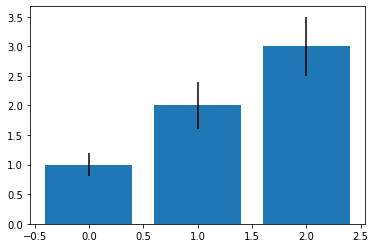

In [174]:
# 막대그래프(bar graph)를 그린다.
means = [1, 2, 3]
stddevs = [0.2, 0.4, 0.5]
bar_labels = ['bar 1', 'bar 2', 'bar 3']

# plot bars
x_pos = list(range(len(bar_labels)))
plt.bar(x_pos, means, yerr=stddevs)

plt.show()

In [175]:
df

,A,B,C,D,F
2019-11-29,0.000000,0.000000,-0.371323,5,1
2019-11-30,1.592663,-0.268881,-2.037288,5,2
2019-12-01,-1.582388,-0.676605,0.993785,5,3
2019-12-02,0.102426,-0.597940,-0.109086,5,4
2019-12-03,1.293907,0.684183,-0.523539,5,5
2019-12-04,-0.364745,1.112383,1.588993,5,6


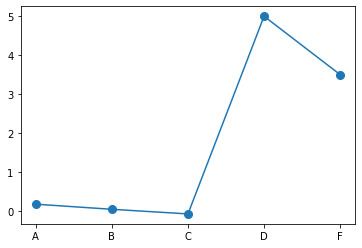

In [176]:
plt.plot(df.mean(0), '-o', ms=8) # mean(0) -> 위에서 아래로 내려가면서 평균을 내줌

<BarContainer object of 5 artists>

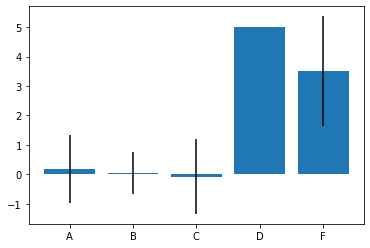

In [177]:
# df의 평균(mean(0))과 표준편차를 이용한 바그래프
bar_labels = df.columns # 가로축
# plot bars
plt.bar(bar_labels, df.mean(0), yerr=df.std(0))

***

## pandas의 데이터 시각화

In [178]:
df

,A,B,C,D,F
2019-11-29,0.000000,0.000000,-0.371323,5,1
2019-11-30,1.592663,-0.268881,-2.037288,5,2
2019-12-01,-1.582388,-0.676605,0.993785,5,3
2019-12-02,0.102426,-0.597940,-0.109086,5,4
2019-12-03,1.293907,0.684183,-0.523539,5,5
2019-12-04,-0.364745,1.112383,1.588993,5,6


### 꺽은선 그래프

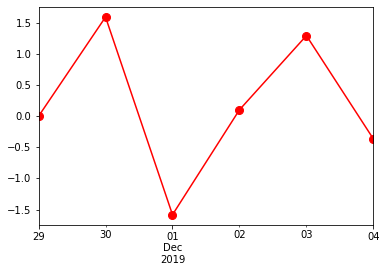

In [179]:
df['A'].plot(marker='o', c='r', ms=8) # df의 A열의 값을/ c는 color

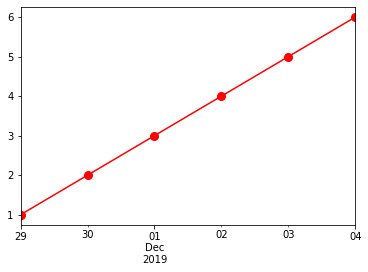

In [180]:
df['F'].plot(marker='o', c='r', ms=8)

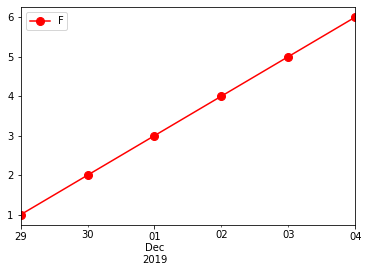

In [181]:
df.plot(y='F', marker='o', c='r', ms=8)   # x-축은 날짜인덱스, y축은 F값

In [182]:
# 두 개의 그래프를 한 축에 그리기
df['A','F'].plot(marker='o', c='r', ms=8)  # 두개를 그릴 때 이 방식은 에러남

KeyError: ignored

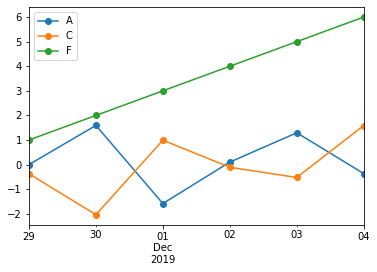

In [183]:
df.plot(y=['A','C','F'], marker='o')

### 산포도 (Scatter graph)

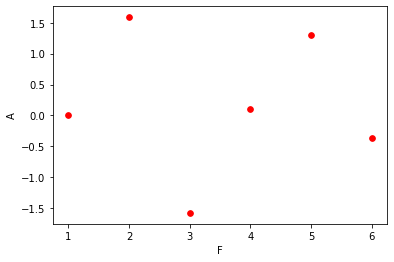

In [184]:
df.plot(kind='scatter',x='F',y='A', color='r', marker='o', s=32)  # kind -> 그래프의 유형 /x축은 F, y축은 A

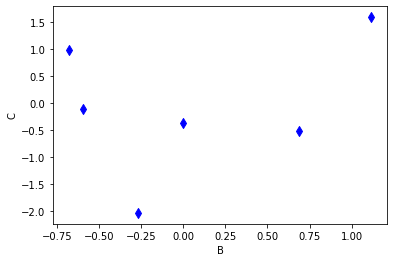

In [185]:
df.plot(kind='scatter',x='B',y='C', color='blue', marker='d', s=50)  # marker='d' -> 다이아몬드 모양

### 바 그래프

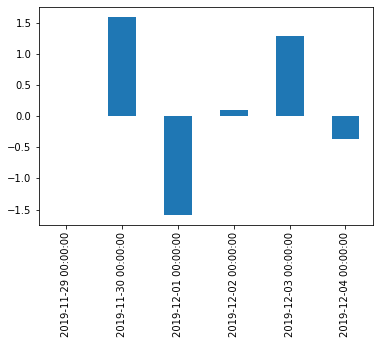

In [186]:
df['A'].plot.bar()

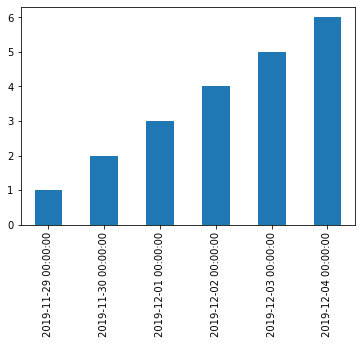

In [187]:
df['F'].plot.bar()

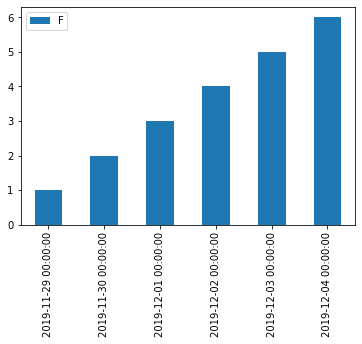

In [188]:
df.plot(kind='bar', y='F')

#### 다중 바그래프

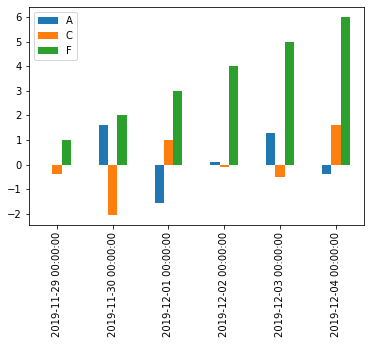

In [189]:
df.plot(kind='bar',y=['A','C','F'])

#### 평균/표준편차 그래프

In [190]:
df.mean(0), df.std(0), df.columns  # A~B까지의 평균과 표준편차

(A    0.173644
 B    0.042190
 C   -0.076410
 D    5.000000
 F    3.500000
 dtype: float64, A    1.155624
 B    0.718672
 C    1.269007
 D    0.000000
 F    1.870829
 dtype: float64, Index(['A', 'B', 'C', 'D', 'F'], dtype='object'))

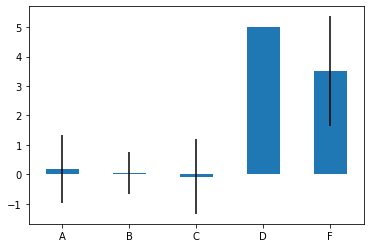

In [191]:
# plot bars
# bar_labels = df.columns
# plt.bar(bar_labels, df.mean(0), yerr=df.std(0))
df.mean(0).plot.bar(yerr=df.std(0), rot=0)  # rot=0 -> 가로축의 문자를 똑바로 세워준다



---



### 그래프 이어 그리기

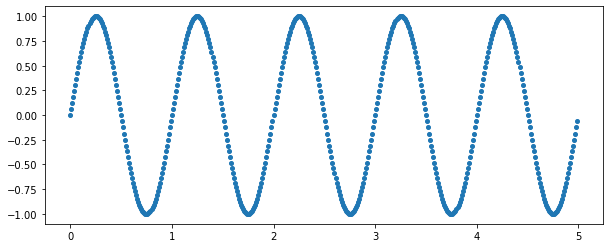

In [192]:
x1 = np.arange(0.0, 5.0, 0.01) # 0부터 5까지 0.01 간격으로 
y1 = np.sin(2*np.pi*x1)
plt.figure(figsize=(10,4))
plt.plot(x1, y1, 'o', ms = 4)

In [193]:
x1.shape, y1.shape

((500,), (500,))

#### pandas 데이터프레임을 이용한 그래프 

In [194]:
df = pd.DataFrame(dict(sine=y1), index=x1, columns=['sine']) # index -> 0부터 5까지 0.01 간격으로 만들어진 값
df.head()

,sine
0.00,0.000000
0.01,0.062791
0.02,0.125333
0.03,0.187381
0.04,0.248690


In [195]:
df.tail()

,sine
4.95,-0.309017
4.96,-0.248690
4.97,-0.187381
4.98,-0.125333
4.99,-0.062791


In [196]:
len(df)

500

In [197]:
pre_size = int(len(df) * 0.8)
post_size = len(df) - pre_size
pre, post = df.iloc[0:pre_size], df.iloc[pre_size:len(df)] # 초반 80% , 후반 80%
print(len(pre), len(post))

400 100


In [198]:
post.shape

(100, 1)

In [0]:
post2 = post + np.random.normal(scale=0.2, size=len(post)).reshape(-1,1)

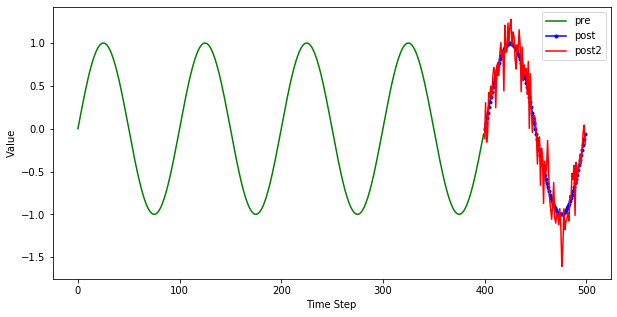

In [200]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(0, len(pre)), pre, 'g', label="pre")
plt.plot(np.arange(len(pre), len(pre) + len(post)), post, 'b', marker='.', label="post")
plt.plot(np.arange(len(pre), len(pre) + len(post)), post2, 'r', label="post2")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

#### post  post2를 동시에 그려서 두 그래프를 비교해보시오. 

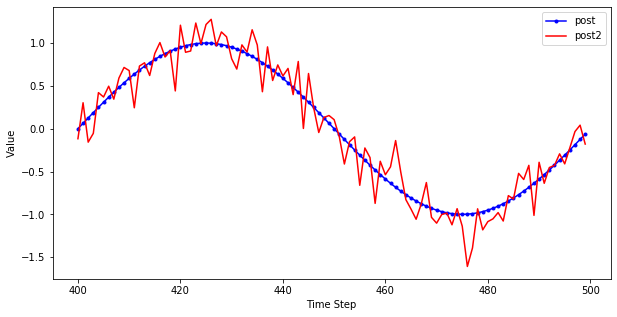

In [201]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(pre), len(pre) + len(post)), post, 'b', marker='.', label="post")
plt.plot(np.arange(len(pre), len(pre) + len(post)), post2, 'r', label="post2")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

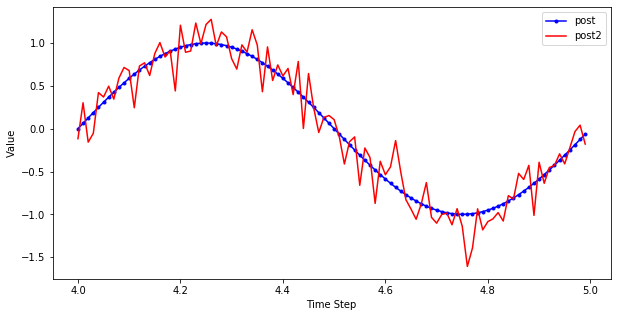

In [202]:
plt.figure(figsize=(10,5))
plt.plot(post, 'b', marker='.', label="post")
plt.plot(post2, 'r', label="post2")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

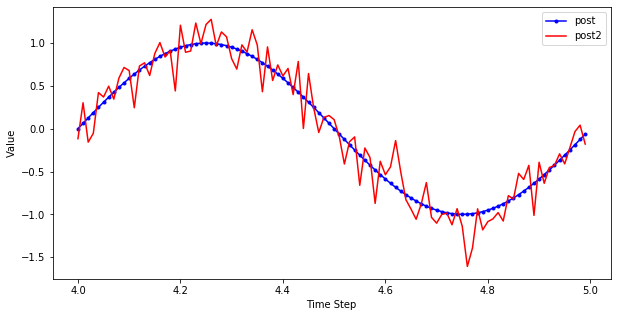

In [203]:
plt.figure(figsize=(10,5))
plt.plot(post, 'b', marker='.', label="post")
plt.plot(post2, 'r', label="post2")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();